In [32]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline
import seaborn as sns 
from sklearn.cluster import KMeans
sns.set(style="darkgrid")

In [24]:
#reading formatted from another file
df = pd.read_csv('formatted_custer.csv')

In [25]:
df.head(2) 

,AGE,TEMPF,PULSE,RESPR,BPSYS,BPDIAS
0,27.0,98.2,72.0,16.0,124.0,74.0
1,52.0,97.3,124.0,16.0,100.0,60.0


In [26]:
df.describe()

,AGE,TEMPF,PULSE,RESPR,BPSYS,BPDIAS
count,29319.000000,29319.000000,29319.000000,29319.000000,29319.000000,29319.000000
mean,40.182340,98.247454,88.304137,18.769569,133.727685,78.569597
std,22.223832,0.891586,19.676935,5.485027,23.570021,14.594608
min,0.000000,91.400000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,97.800000,75.000000,16.000000,117.000000,69.000000
50%,38.000000,98.200000,86.000000,18.000000,131.000000,78.000000
75%,56.000000,98.600000,99.000000,20.000000,147.000000,87.000000
max,92.000000,109.000000,233.000000,150.000000,287.000000,187.000000


In [27]:
scaled_df = df.copy()  

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaled_df=MinMaxScaler().fit_transform(scaled_df)

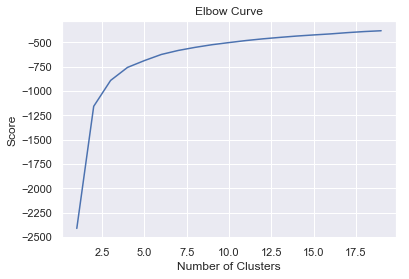

In [31]:
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)

In [34]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    

    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')


    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=1) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Triage Dataset");

In [35]:
kmeans.labels_

array([0, 2, 0, ..., 2, 1, 2], dtype=int32)

In [36]:
X_scaled = df.copy() 

In [37]:
from sklearn.cluster import KMeans

nclusters = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([3, 0, 0, ..., 2, 2, 3], dtype=int32)

In [38]:
from sklearn.decomposition import PCA

ndimensions = 2 #change to 6 and see the scale how it works

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
23855,-24.597357,-3.624925
18412,-25.427237,4.485541
8391,32.034623,-3.832286
22940,46.866784,-0.427013
11835,0.268133,14.152946


In [39]:

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot.sample(5)

,PC1,PC2,ClusterKmeans
18827,-27.233190,-22.345328,0
13818,-13.288994,-6.959021,4
1273,14.451880,2.173620,4
24820,-21.224079,0.638260,3
21502,-6.729200,3.954139,4


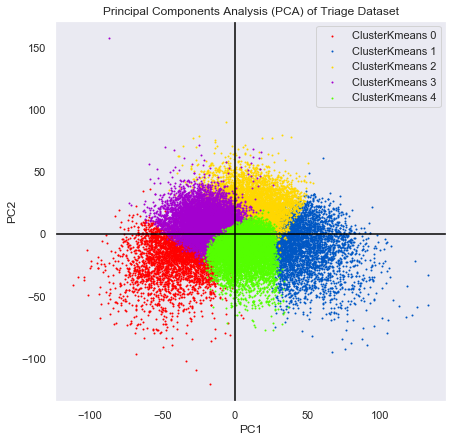

In [40]:
plotData(df_plot, 'ClusterKmeans')

In [41]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 2, 3, ..., 1, 4, 1])

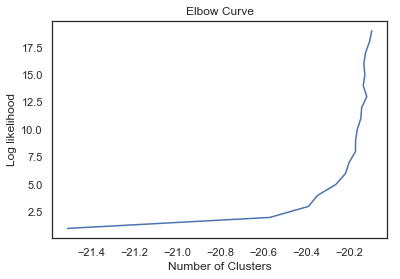

In [21]:
num_clusters = range(1, 20)
gmm = [GaussianMixture(n_components=i) for i in num_clusters]
score = [gmm[i].fit(scaled_df).score(scaled_df) for i in range(len(gmm))]
plt.plot(Nc,score)
plt.xlabel('Log likelihood')
plt.ylabel('Number of Clusters')
plt.title('Elbow Curve')
plt.show()

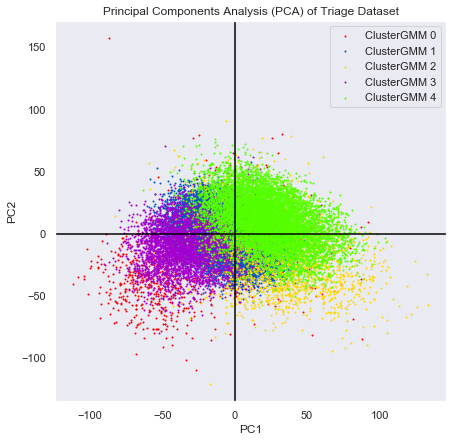

In [42]:
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [32]:
df['ClusterKmeans'] = df_plot['ClusterKmeans']

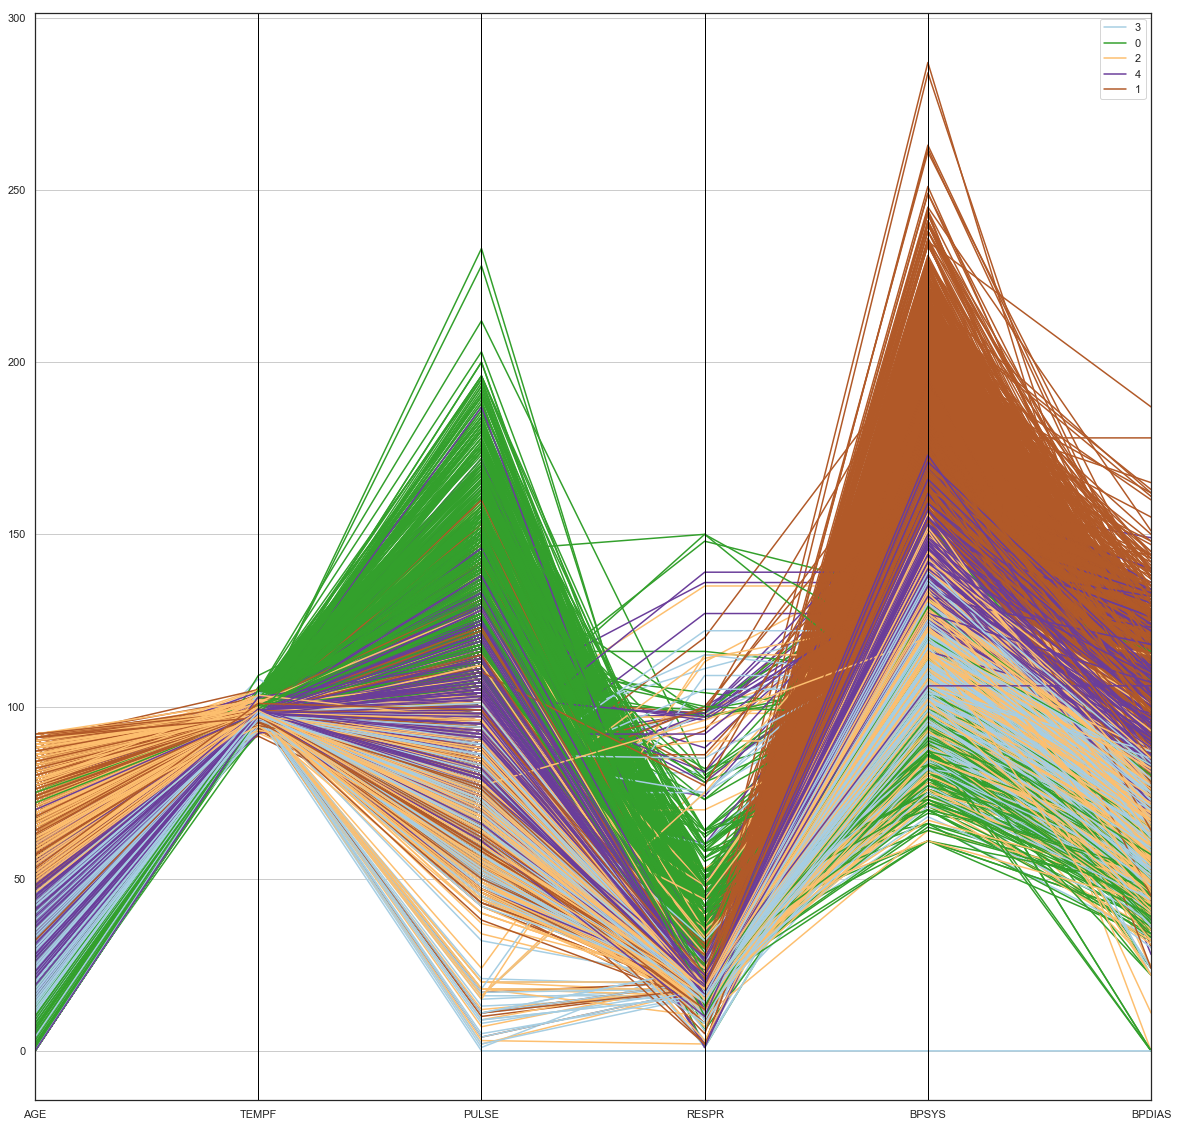

In [35]:
#parallel plots to map the clusters together. For ClusterKmeans
plt.figure(figsize=(20,20))
pd.plotting.parallel_coordinates(df,
                                  'ClusterKmeans',
                                 colormap= "Paired"
                                )
plt.show() 

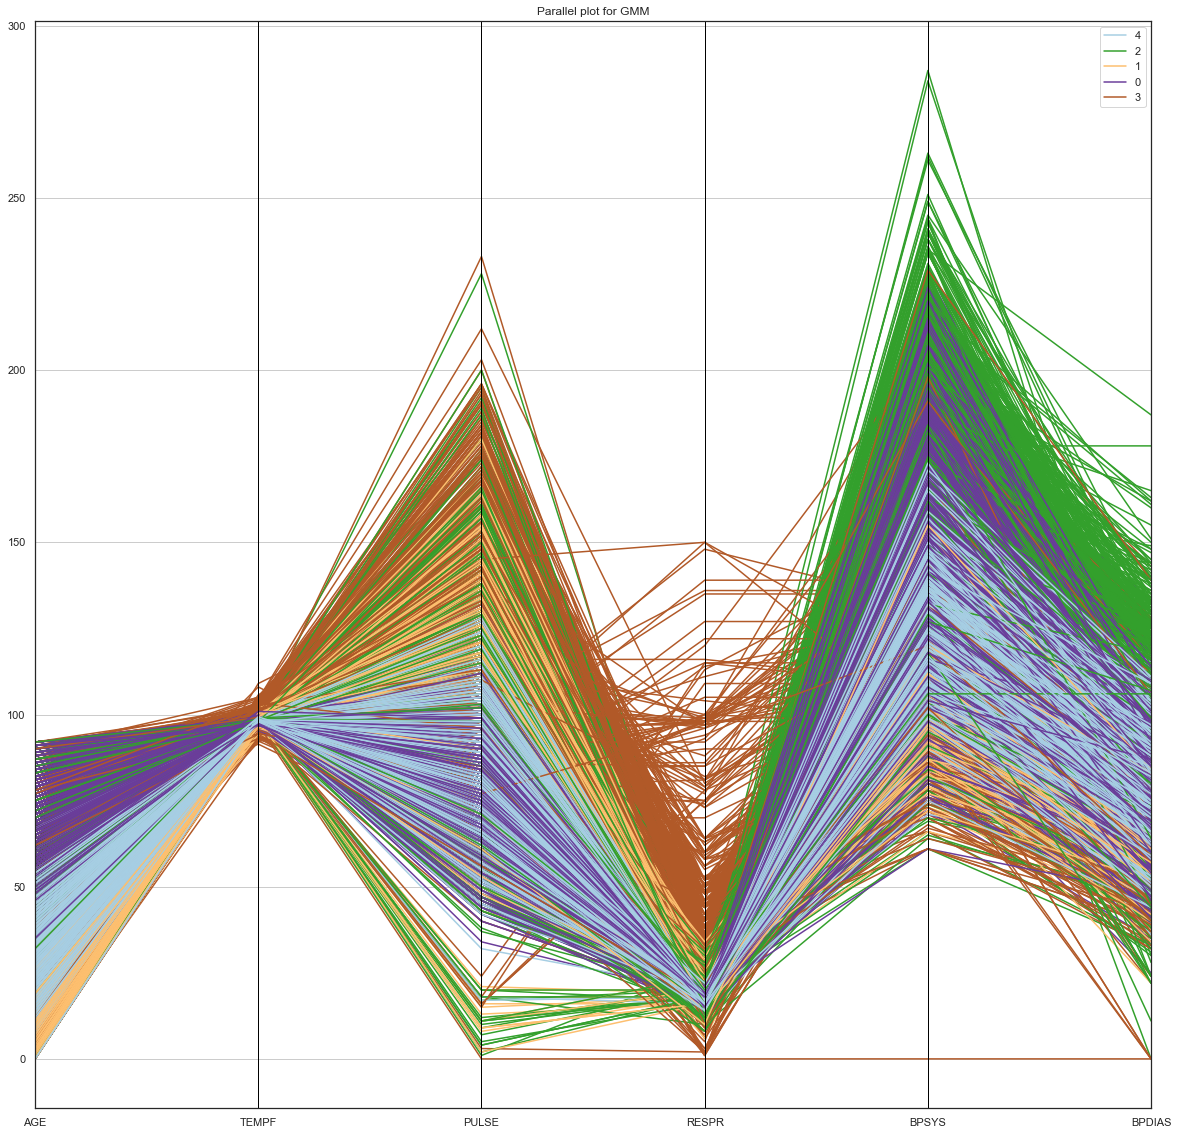

In [38]:
#for GMM's
plt.figure(figsize=(20,20))
plt.title('Parallel plot for GMM')
pd.plotting.parallel_coordinates(df.drop('ClusterKmeans', axis=1),
                                  'ClusterGMM',
                                 colormap= "Paired"
                                )
plt.show() 